In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40


In [6]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

(todo exemplo tem pelo menos 1 atributo ausente)

---
## info do host

In [ ]:
df[[
    'host_location',
    'host_response_time', #ok
    'host_response_rate', #ok
    'host_is_superhost', #ok
    'host_total_listings_count', #ok
    'host_identity_verified', #ok
    'host_verifications'
]]

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,host_neighbourhood,host_verifications
0,"Rio de Janeiro, Brazil",within an hour,100%,f,5.0,t,Copacabana,"['email', 'phone']"
1,"Rio de Janeiro, Brazil",NaN,NaN,t,5.0,t,Copacabana,"['email', 'phone']"
2,"Rio de Janeiro, Brazil",within an hour,100%,t,2.0,t,Copacabana,"['email', 'phone']"
3,"Rio de Janeiro, Brazil",within an hour,100%,t,33.0,t,Ipanema,"['email', 'phone', 'work_email']"
4,"Rio de Janeiro, Brazil",within an hour,100%,f,7.0,t,Copacabana,"['email', 'phone']"
...,...,...,...,...,...,...,...,...
42567,NaN,NaN,NaN,f,1.0,t,Copacabana,['phone']
42568,"Rio de Janeiro, Brazil",NaN,NaN,f,1.0,t,Jacarepaguá,"['email', 'phone']"
42569,NaN,within an hour,93%,t,12.0,t,Ipanema,"['email', 'phone']"
42570,Brazil,NaN,NaN,f,1.0,t,Camorim,['phone']


In [33]:
df['host_location'].value_counts()

host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Brazil                               672
São Paulo, Brazil                    645
                                   ...  
Presidente Venceslau, Brazil           1
Beaulieu-sur-Mer, France               1
Manchester, United Kingdom             1
Maravilha, Brazil                      1
Mariana, Brazil                        1
Name: count, Length: 626, dtype: int64

In [40]:
df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()

/tmp/ipykernel_25754/167682424.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()


host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Name: count, dtype: int64

In [47]:
bairros = df['neighbourhood_cleansed'].unique()

In [59]:
df.loc[df['host_location'].isna() & df['host_neighbourhood'].notna(), 'host_neighbourhood']

68                   Vidigal
85                Copacabana
94                Copacabana
229               Copacabana
330               Copacabana
                ...         
42561    Vicente de Carvalho
42562                 Cosmos
42565                Ipanema
42567             Copacabana
42569                Ipanema
Name: host_neighbourhood, Length: 7347, dtype: object

In [63]:
mask = df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) and (x.host_neighbourhood not in bairros), axis=1)
df.loc[mask, ['host_location','host_neighbourhood']]

,host_location,host_neighbourhood
25,"Rio de Janeiro, Brazil",Jardin Botânico
31,"Rio de Janeiro, Brazil",Lapa
66,"Rio de Janeiro, Brazil",NaN
67,"Rio de Janeiro, Brazil",Lapa
71,"Rio de Janeiro, Brazil",Jardin Botânico
...,...,...
42251,"Rio de Janeiro, Brazil",Vila de Ponta Negra
42321,"Rio de Janeiro, Brazil",NaN
42384,"Rio de Janeiro, Brazil",Ilha do Governador
42398,"Rio de Janeiro, Brazil",City Areal


In [60]:
#df['host_neighbourhood_plus'] = 
df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) or (x.host_neighbourhood in bairros), axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
42567    True
42568    True
42569    True
42570    True
42571    True
Length: 42572, dtype: bool

In [20]:
pd.isna(df.at[35,'price'])

True

In [22]:
df['price'] = df['price'].apply(lambda x: x if pd.isna(x) else float(x[1:].replace(',','')))

<Axes: xlabel='maximum_nights_avg_ntm', ylabel='price'>

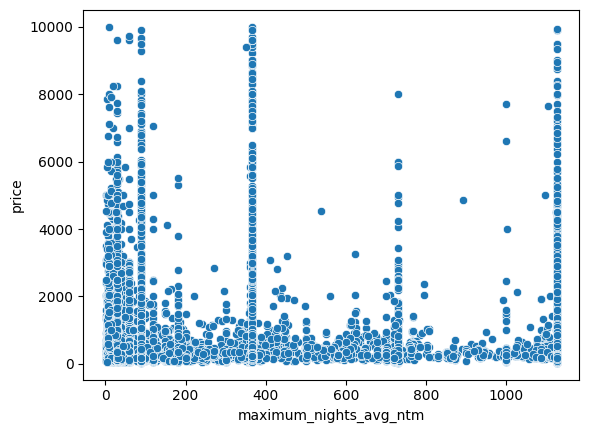

In [26]:
sns.scatterplot(df[df['price']<10000], x='maximum_nights_avg_ntm', y='price')

---
## info da casa

In [68]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [69]:
df[[
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'amenities'
]]

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
0,Copacabana,Entire condo,Entire home/apt,5,1.0,2.0,2.0,"[""Oven"", ""Building staff"", ""TV with standard c..."
1,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Window AC unit"", ""Room-darkening shades"", ""D..."
2,Copacabana,Entire loft,Entire home/apt,2,1.5,1.0,1.0,"[""Building staff"", ""Bed linens"", ""Heating"", ""P..."
3,Ipanema,Entire rental unit,Entire home/apt,13,7.0,6.0,7.0,"[""Pack \u2019n play/Travel crib"", ""Private pat..."
4,Copacabana,Entire rental unit,Entire home/apt,10,2.5,4.0,4.0,"[""Microwave"", ""Dedicated workspace"", ""Hot wate..."
...,...,...,...,...,...,...,...,...
42567,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Exterior security cameras on property"", ""TV""..."
42568,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Exterior security cameras on property"", ""Ded..."
42569,Ipanema,Shared room in hostel,Shared room,9,6.0,NaN,1.0,"[""Microwave"", ""Coffee maker: drip coffee maker..."
42570,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""TV"", ""Kitchen"", ""Free..."


In [71]:
df['property_type'].value_counts()

property_type
Entire rental unit                    27839
Private room in rental unit            4929
Entire home                            2079
Entire condo                           1812
Private room in home                   1489
                                      ...  
Shared room in dome                       1
Shared room in cottage                    1
Private room in shipping container        1
Private room in cabin                     1
Tent                                      1
Name: count, Length: 82, dtype: int64

In [78]:
df['source'].value_counts()

source
city scrape        38994
previous scrape     3578
Name: count, dtype: int64

In [98]:
teste = 'Dome'

for idx, item in df[df['property_type']==teste].iloc[0].reset_index().values:
    print(idx, '\t\t', item)

df[df['property_type']==teste]

id 		 48312250
listing_url 		 https://www.airbnb.com/rooms/48312250
scrape_id 		 20250624193519
last_scraped 		 2025-06-26
source 		 city scrape
name 		 Kitnet /centro  santa Teresa
description 		 nan
neighborhood_overview 		 nan
picture_url 		 https://a0.muscache.com/pictures/dbc46ef2-54ba-4ad9-b5fd-47773835d9d9.jpg
host_id 		 316197297
host_url 		 https://www.airbnb.com/users/show/316197297
host_name 		 Andrezza
host_since 		 2019-12-10
host_location 		 Rio de Janeiro, Brazil
host_about 		 nan
host_response_time 		 a few days or more
host_response_rate 		 10%
host_acceptance_rate 		 3%
host_is_superhost 		 f
host_thumbnail_url 		 https://a0.muscache.com/im/pictures/user/9099b0eb-4945-4cbf-83eb-42789d2a495f.jpg?aki_policy=profile_small
host_picture_url 		 https://a0.muscache.com/im/pictures/user/9099b0eb-4945-4cbf-83eb-42789d2a495f.jpg?aki_policy=profile_x_medium
host_neighbourhood 		 nan
host_listings_count 		 6.0
host_total_listings_count 		 11.0
host_verifications 		 ['email', 'pho

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10714,48312250,https://www.airbnb.com/rooms/48312250,20250624193519,2025-06-26,city scrape,Kitnet /centro santa Teresa,NaN,NaN,https://a0.muscache.com/pictures/dbc46ef2-54ba...,316197297,...,4.5,4.75,4.75,NaN,f,3,3,0,0,0.08


In [ ]:
for idx, item in df['property_type'].value_counts().reset_index().values:
    print(f'{idx:32}\t {item}')

Entire rental unit              	 27839
Private room in rental unit     	 4929
Entire home                     	 2079
Entire condo                    	 1812
Private room in home            	 1489
Entire loft                     	 833
Entire serviced apartment       	 763
Room in hotel                   	 417
Private room in bed and breakfast	 406
Private room in condo           	 359
Shared room in rental unit      	 166
Entire guesthouse               	 129
Private room in guesthouse      	 125
Room in aparthotel              	 118
Shared room in home             	 99
Entire villa                    	 95
Private room in guest suite     	 89
Private room in serviced apartment	 74
Tiny home                       	 71
Entire guest suite              	 65
Shared room in bed and breakfast	 60
Private room in hostel          	 39
Shared room in guesthouse       	 33
Entire cabin                    	 31
Private room in casa particular 	 30
Entire cottage                  	 30
Private room   

In [92]:
for idx, item in df.loc[df['room_type']=='Private room', 'property_type'].value_counts().reset_index().values:
    print(f'{idx:32}\t {item}')

Private room in rental unit     	 4929
Private room in home            	 1489
Room in hotel                   	 411
Private room in bed and breakfast	 406
Private room in condo           	 359
Private room in guesthouse      	 125
Private room in guest suite     	 89
Private room in serviced apartment	 74
Private room in hostel          	 39
Private room in casa particular 	 30
Room in aparthotel              	 30
Private room                    	 29
Private room in townhouse       	 28
Private room in loft            	 23
Room in boutique hotel          	 18
Private room in villa           	 18
Private room in nature lodge    	 13
Private room in earthen home    	 12
Private room in tiny home       	 4
Private room in farm stay       	 4
Private room in treehouse       	 3
Private room in boat            	 3
Private room in chalet          	 2
Private room in cottage         	 2
Private room in resort          	 2
Private room in tower           	 2
Private room in tent            	 2

In [70]:
df['room_type'].value_counts()

room_type
Entire home/apt    33990
Private room        8152
Shared room          407
Hotel room            23
Name: count, dtype: int64

In [ ]:
df['neighbourhood_cleansed']